In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [2]:
#Importing application_data.csv file for analysis
application_data = pd.read_csv('application_data.csv')

In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
application_data.shape

(307511, 122)

**TASK -2 : DATA CLEANING**

In [6]:
application_data.isnull().sum().sort_values(ascending=False).head(67)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64

If a column has more than 50% of null values delete those columns for better analysis 

In [7]:

application_data = application_data[application_data.columns[application_data.isnull().sum()<(len(application_data)/2)]]

In [8]:
#Rechecking the data frame after manipulation
application_data.shape

(307511, 81)

In [9]:
#categorical  and Numerical columns 
application_numeric_columns = []
application_categorical_columns = []
for i in application_data.columns:
  if application_data[i].dtype in ['float64','int64']:
    application_numeric_columns.append(i)
  else:
    application_categorical_columns.append(i)

In [10]:
application_numeric_columns


['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'F

In [11]:
application_categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [12]:
#Calculating missing values percentage in  application dataset

application_missingValues = 100*application_data.isnull().sum()/application_data.shape[0]
application_missingValues = application_missingValues.to_frame()
application_missingValues.reset_index(level=0,inplace=True)
application_missingValues.columns = ['Column','Null_Percent']

In [13]:
application_missingValues.shape

(81, 2)

In [14]:
#Handling data in coolumns which have less than 50% of missing values
application_missingValues[application_missingValues.Null_Percent>0].sort_values(by='Null_Percent',ascending=False)

,Column,Null_Percent
43,FLOORSMAX_AVG,49.760822
45,FLOORSMAX_MODE,49.760822
47,FLOORSMAX_MEDI,49.760822
42,YEARS_BEGINEXPLUATATION_AVG,48.781019
44,YEARS_BEGINEXPLUATATION_MODE,48.781019
46,YEARS_BEGINEXPLUATATION_MEDI,48.781019
48,TOTALAREA_MODE,48.268517
49,EMERGENCYSTATE_MODE,47.398304
27,OCCUPATION_TYPE,31.345545
41,EXT_SOURCE_3,19.825307


Imputing Missing Values Greater than 30% less than 50%

In [15]:
#Analyzing FLOORSMAX_AVG Column
application_data['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

In [16]:
application_data['FLOORSMAX_AVG'].fillna(application_data['FLOORSMAX_AVG'].median(), inplace=True)

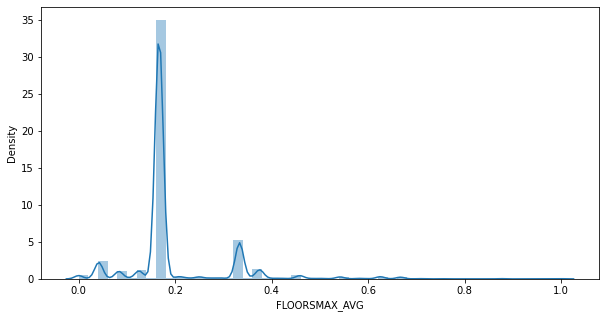

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(application_data['FLOORSMAX_AVG'])
plt.show();

After imputing , the values of FLOORSMAX_AVG are normally distributed.

In [18]:
#Analyzing FLOORSMAX_MODE Column
application_data['FLOORSMAX_MODE'].describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

In [19]:
application_data['FLOORSMAX_MODE'].fillna(application_data['FLOORSMAX_MODE'].median(), inplace=True)

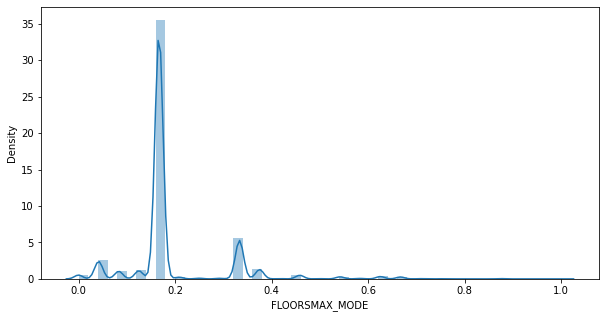

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(application_data['FLOORSMAX_MODE'])
plt.show();

After imputing , the values of FLOORSMAX_MODE are normally distributed.







In [21]:
#Analyzing FLOORSMAX_MEDI Column
application_data['FLOORSMAX_MEDI'].describe()

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

In [22]:
application_data['FLOORSMAX_MEDI'].fillna(application_data['FLOORSMAX_MEDI'].median(), inplace=True)

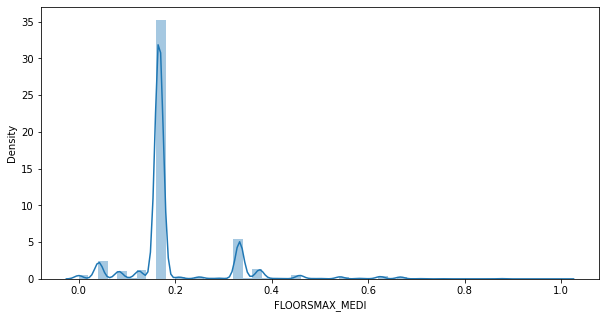

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(application_data['FLOORSMAX_MEDI'])
plt.show();

After imputing , the values of FLOORSMAX_MEDI are normally distributed.




In [24]:
#Analyzing YEARS_BEGINEXPLUATATION_AVG Column
application_data['YEARS_BEGINEXPLUATATION_AVG'].describe()

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [25]:
application_data['YEARS_BEGINEXPLUATATION_AVG'].fillna(application_data['YEARS_BEGINEXPLUATATION_AVG'].median(), inplace=True)

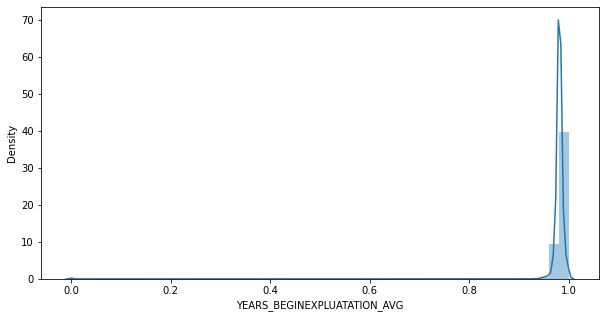

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(application_data['YEARS_BEGINEXPLUATATION_AVG'])
plt.show();

After imputing , the values of YEARS_BEGINEXPLUATATION_AVG are skewed distributed.

In [27]:
#Analyzing YEARS_BEGINEXPLUATATION_MODE Column
application_data['YEARS_BEGINEXPLUATATION_MODE'].describe()

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [28]:
application_data['YEARS_BEGINEXPLUATATION_MODE'].fillna(application_data['YEARS_BEGINEXPLUATATION_MODE'].median(), inplace=True)

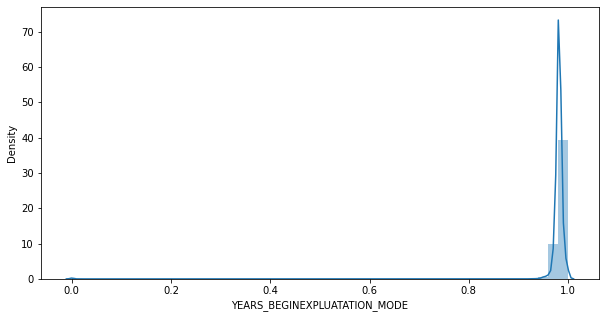

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(application_data['YEARS_BEGINEXPLUATATION_MODE'])
plt.show();

After imputing , the values of YEARS_BEGINEXPLUATATION_MODE are skewed distributed.

In [30]:
#Analyzing YEARS_BEGINEXPLUATATION_MEDI Column
application_data['YEARS_BEGINEXPLUATATION_MEDI'].describe()

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [31]:
application_data['YEARS_BEGINEXPLUATATION_MEDI'].fillna(application_data['YEARS_BEGINEXPLUATATION_MEDI'].median(), inplace=True)

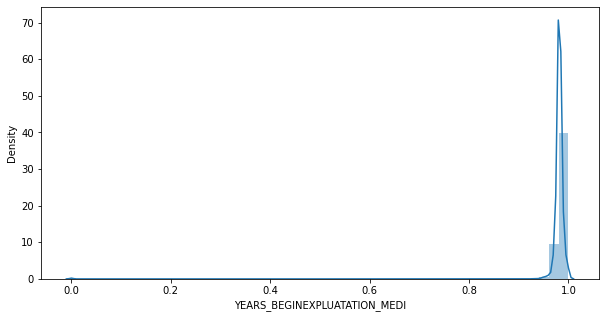

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(application_data['YEARS_BEGINEXPLUATATION_MEDI'])
plt.show();

After imputing , the values of YEARS_BEGINEXPLUATATION_MEDI are skewed distributed.

In [33]:
#Analyzing TOTALAREA_MODE Column
application_data['TOTALAREA_MODE'].describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

In [34]:
application_data['TOTALAREA_MODE'].fillna(application_data['TOTALAREA_MODE'].median(), inplace=True)

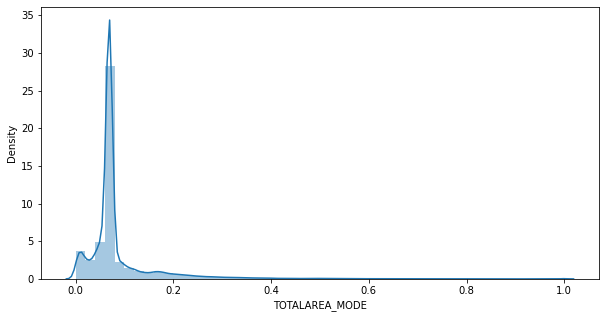

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(application_data['TOTALAREA_MODE'])
plt.show();


After imputing , the values of TOTALAREA_MODE are skewed distributed.


In [36]:
#Analyzing EMERGENCYSTATE_MODE Column
application_data['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [37]:
application_data['EMERGENCYSTATE_MODE'].isnull().sum()

145755

In [38]:
application_data['EMERGENCYSTATE_MODE'].fillna('UNKNOWN', inplace=True)

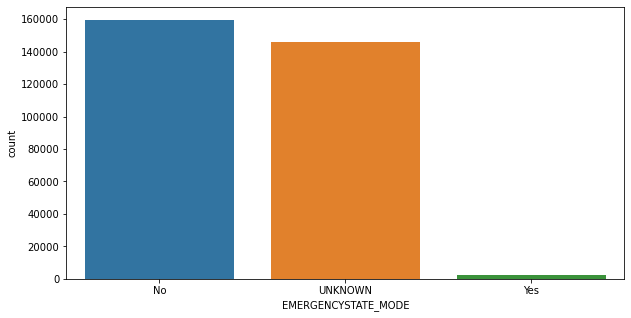

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EMERGENCYSTATE_MODE', data=application_data)
plt.show();

Before Handling the EMERGENCYSTATE_MODE column,it is highly skewed towards **NO** . Instead of Imputing mode of the column, we added Unknown as third Category

In [40]:
#Analyzing OCCUPATION_TYPE Column
application_data['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [41]:
application_data['OCCUPATION_TYPE'].fillna('UNKNOWN', inplace=True)

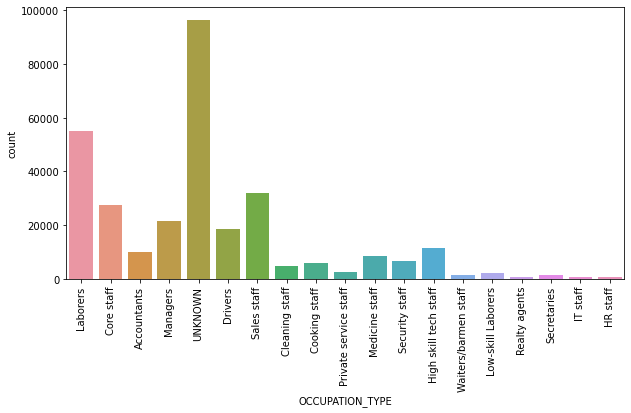

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'OCCUPATION_TYPE', data=application_data)
plt.xticks(rotation = 90)
plt.show();

Before Handling the OCCUPATION_TYPE column,it is highly skewed towards **LABORERS** . Instead of Imputing mode of the column, we added Unknown as third Category

--> Analyzing Columns Greater than 10 percent and Less than 30 percent

In [43]:
#Analyzing EXT_SOURCE_3 Column
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [44]:
application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].median(), inplace=True)

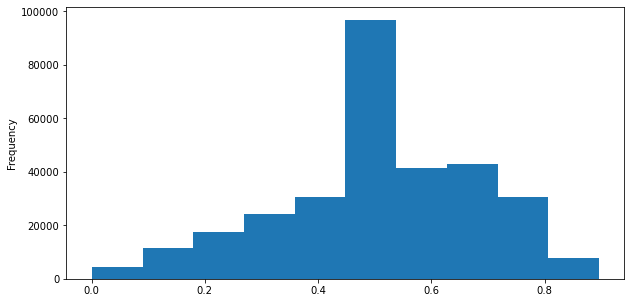

In [45]:
plt.figure(figsize=(10,5))
application_data['EXT_SOURCE_3'].plot.hist()
plt.show();

After Imputing in EXT_SOURCE_3 column, it is normally distributed

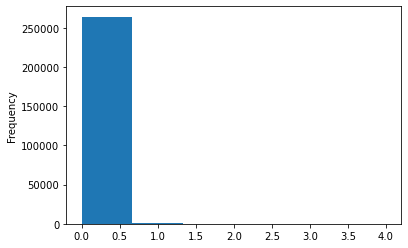

In [46]:
#Analyzing AMT_REQ_CREDIT_BUREAU_HOUR Column
num_unique_values = len(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins= num_unique_values)
plt.show();

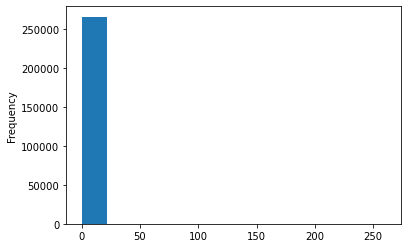

In [47]:
#Analyzing AMT_REQ_CREDIT_BUREAU_QRT Column
num_unique_values = len(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins= num_unique_values)
plt.show();

In [48]:
#Analyzing AMT_REQ_CREDIT_BUREAU_MON Column
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [49]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

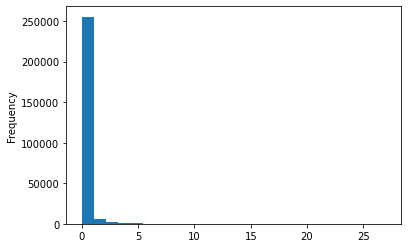

In [50]:
num_unique_values = len(application_data['AMT_REQ_CREDIT_BUREAU_MON'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins= num_unique_values)
plt.show();

In [51]:
#Analyzing AMT_REQ_CREDIT_BUREAU_WEEK Column
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [52]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

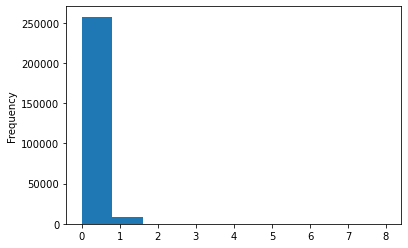

In [53]:
num_unique_values = len(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins= num_unique_values)
plt.show();

In [54]:
#Analyzing AMT_REQ_CREDIT_BUREAU_DAY Column
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [55]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

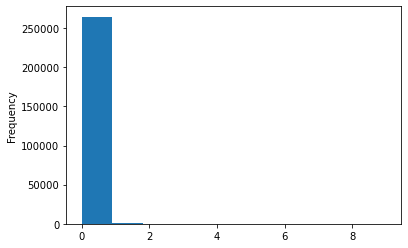

In [56]:
num_unique_values = len(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins= num_unique_values)
plt.show();

In [57]:
#Analyzing AMT_REQ_CREDIT_BUREAU_YEAR Column
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [58]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].head()

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

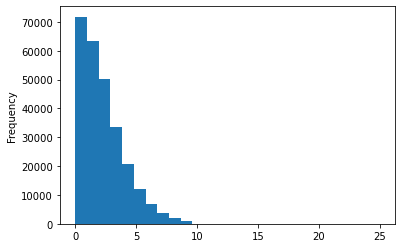

In [59]:
num_unique_values = len(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].unique())
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins= num_unique_values)
plt.show();

**As we can see, mostly the values are 0's. So, this column is mainly acting as a Constant. Hence, we can ignore these columns (AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_YEAR) for our analysis.**




Handling Null values for the columns which are lying in between 0 to 10%

In [60]:
missing_values_under_ten = application_missingValues[(application_missingValues.Null_Percent < 10) & (application_missingValues.Null_Percent > 0)]

In [61]:
missing_values_under_ten.values

array([['AMT_ANNUITY', 0.0039022994299390914],
       ['AMT_GOODS_PRICE', 0.09040327012692229],
       ['NAME_TYPE_SUITE', 0.42014757195677555],
       ['CNT_FAM_MEMBERS', 0.000650383238323182],
       ['EXT_SOURCE_2', 0.21462646864665003],
       ['OBS_30_CNT_SOCIAL_CIRCLE', 0.3320206431639844],
       ['DEF_30_CNT_SOCIAL_CIRCLE', 0.3320206431639844],
       ['OBS_60_CNT_SOCIAL_CIRCLE', 0.3320206431639844],
       ['DEF_60_CNT_SOCIAL_CIRCLE', 0.3320206431639844],
       ['DAYS_LAST_PHONE_CHANGE', 0.000325191619161591]], dtype=object)

In [62]:
#Deleting missing value Rows for numeric and catergorical data
application_data.dropna(axis = 0,inplace = True,how = 'any')

For less than 10% we can drop the rows in a columns, as  missing value rows are insignificant for analysis.

**CHECK POINT**

In [64]:
application_data.shape

(263423, 81)

In [65]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263423 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    263423 non-null  int64  
 1   TARGET                        263423 non-null  int64  
 2   NAME_CONTRACT_TYPE            263423 non-null  object 
 3   CODE_GENDER                   263423 non-null  object 
 4   FLAG_OWN_CAR                  263423 non-null  object 
 5   FLAG_OWN_REALTY               263423 non-null  object 
 6   CNT_CHILDREN                  263423 non-null  int64  
 7   AMT_INCOME_TOTAL              263423 non-null  float64
 8   AMT_CREDIT                    263423 non-null  float64
 9   AMT_ANNUITY                   263423 non-null  float64
 10  AMT_GOODS_PRICE               263423 non-null  float64
 11  NAME_TYPE_SUITE               263423 non-null  object 
 12  NAME_INCOME_TYPE              263423 non-nul

In [66]:
application_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 81, dtype: int64

In [67]:
#Rechecking missing values percentage in  application dataset

application_missingValues = 100*application_data.isnull().sum()/application_data.shape[0]
application_missingValues = application_missingValues.to_frame()
application_missingValues.reset_index(level=0,inplace=True)
application_missingValues.columns = ['Column','Null_Percent']


In [68]:
application_missingValues[application_missingValues.Null_Percent>0].sort_values(by='Null_Percent',ascending=False)

,Column,Null_Percent


**Data Cleaning is completed**

**UNIVARIATE ANALYSIS**

**Defaulters and NonDefaulters Info**

In [69]:
#Checking the percentage of customers facing difficulties vs Rest of the cases
application_data.TARGET.shape

(263423,)

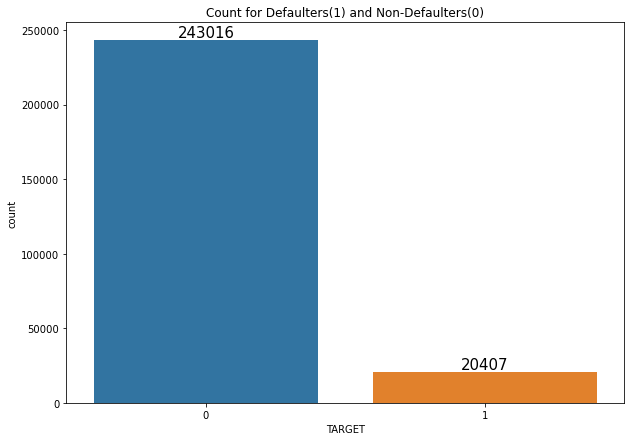

In [70]:
plt.figure(figsize=(10,7))
plt.title("Count for Defaulters(1) and Non-Defaulters(0)")
plots = sns.countplot(x = 'TARGET', data=application_data )
for bar in plots.patches:
  plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show();

In [71]:
application_data[application_data.TARGET == 1].shape[0]/application_data.shape[0]*100

7.746855817449501

In [72]:
application_data[application_data.TARGET == 0].shape[0]/application_data.shape[0]*100

92.2531441825505

7.74 percent of total sample data are defaulters

**Contract Type Info**

In [73]:
application_data.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.909408
Revolving loans    0.090592
Name: NAME_CONTRACT_TYPE, dtype: float64

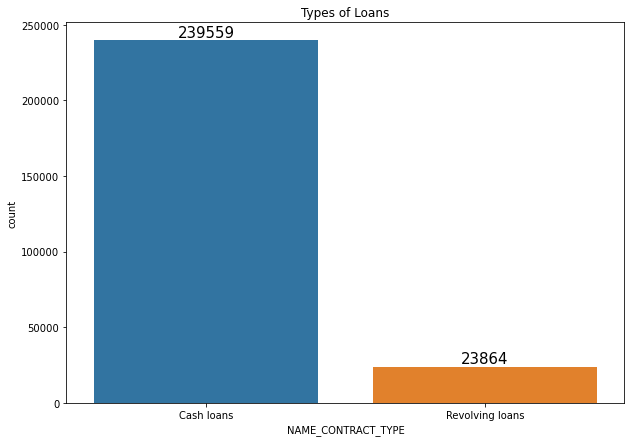

In [74]:
plt.figure(figsize=(10,7))
plt.title("Types of Loans")
plots = sns.countplot(x = 'NAME_CONTRACT_TYPE', data=application_data )
for bar in plots.patches:
  plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show();

most of the people are applying for cash loans nearly 90.94 percent

**Total Income of Customers Info**

In [75]:
application_data.AMT_INCOME_TOTAL.head(5)

0    202500.0
1    270000.0
2     67500.0
4    121500.0
5     99000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [76]:
application_data['AMT_INCOME_CATEGORY'] = application_data.AMT_INCOME_TOTAL.apply(lambda x : 'Greater than 5 Lakhs' if x > 500000 else ('Between 4 lakhs and 5 Lakhs' if x < 500000 and x > 400000 else ('Between 3 lakhs and 4 Lakhs'  if x < 400000 and x > 300000 else 'Less than 3 Lakhs')))

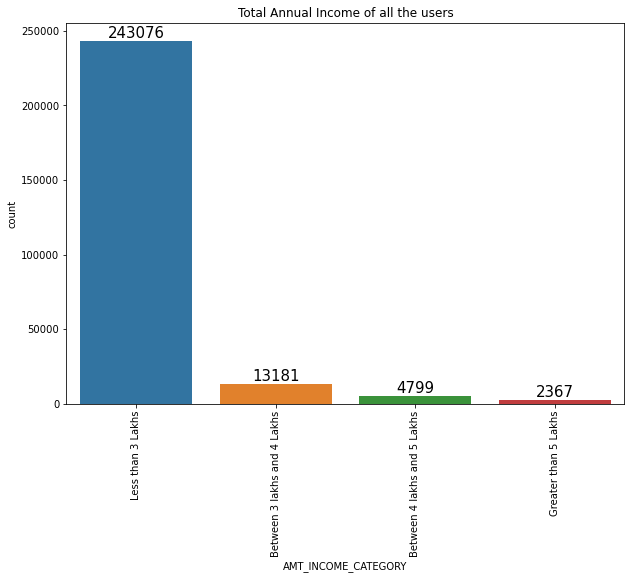

In [77]:
plt.figure(figsize=(10,7))
plt.title("Total Annual Income of all the users")
plots = sns.countplot(x = 'AMT_INCOME_CATEGORY', data=application_data )
for bar in plots.patches:
  plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.xticks(rotation = 90)
plt.show();

In [78]:
application_data['AMT_INCOME_CATEGORY'].value_counts(normalize = True)

Less than 3 Lakhs              0.922759
Between 3 lakhs and 4 Lakhs    0.050037
Between 4 lakhs and 5 Lakhs    0.018218
Greater than 5 Lakhs           0.008986
Name: AMT_INCOME_CATEGORY, dtype: float64

92.25% customers are earning less than 3 lakhs

**Gender Info**

In [79]:
application_data.CODE_GENDER.value_counts(normalize=True)

F      0.662710
M      0.337275
XNA    0.000015
Name: CODE_GENDER, dtype: float64

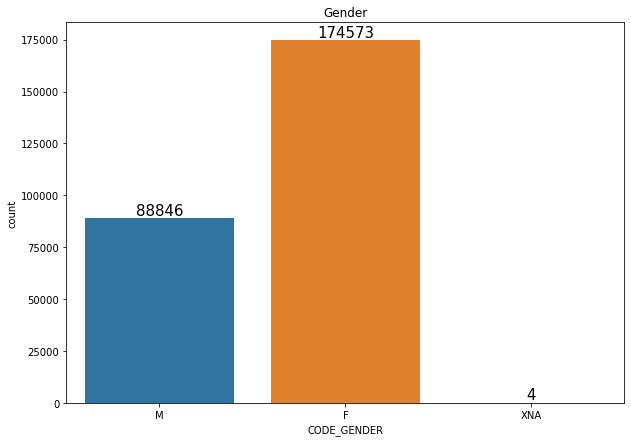

In [80]:
plt.figure(figsize=(10,7))
plt.title("Gender")
plots = sns.countplot(x = 'CODE_GENDER', data=application_data )
for bar in plots.patches:
  plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show();

**Female Customers with 66.2 percent are highly fascinated to apply loans than Male Clients.

**Accompanying client Info**

In [81]:
application_data.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.813968
Family             0.130118
Spouse, partner    0.036356
Children           0.010493
Other_B            0.005531
Other_A            0.002688
Group of people    0.000847
Name: NAME_TYPE_SUITE, dtype: float64

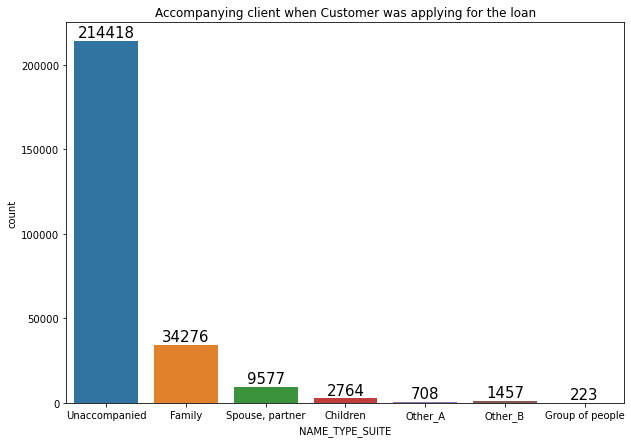

In [82]:
plt.figure(figsize=(10,7))
plt.title("Accompanying client when Customer was applying for the loan")
plots = sns.countplot(x = 'NAME_TYPE_SUITE', data=application_data )
for bar in plots.patches:
  plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show();

It is clearly visible from the plot that most of the customers are **Unaccompanied** with 81.2 percent

**Customer source of Income Info**

In [83]:
application_data.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.515141
Commercial associate    0.231984
Pensioner               0.179453
State servant           0.073342
Student                 0.000053
Businessman             0.000015
Unemployed              0.000008
Maternity leave         0.000004
Name: NAME_INCOME_TYPE, dtype: float64

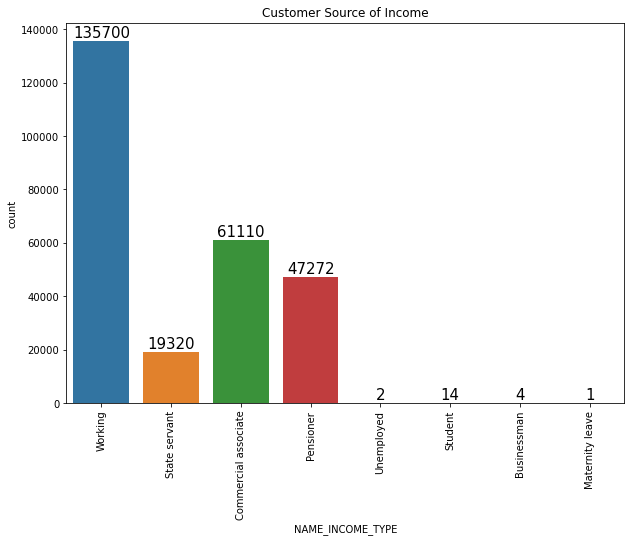

In [84]:
plt.figure(figsize=(10,7))
plt.title("Customer Source of Income")
plots = sns.countplot(x = 'NAME_INCOME_TYPE', data=application_data )
plt.xticks(rotation = 90)
for bar in plots.patches:
  plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show();

Mostly there were **working** customers  with 51 percent followed by **Commercial Associate** and **Pensioner**.

**Customers Education Info**

In [85]:
application_data.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.706339
Higher education                 0.248915
Incomplete higher                0.032332
Lower secondary                  0.011871
Academic degree                  0.000543
Name: NAME_EDUCATION_TYPE, dtype: float64

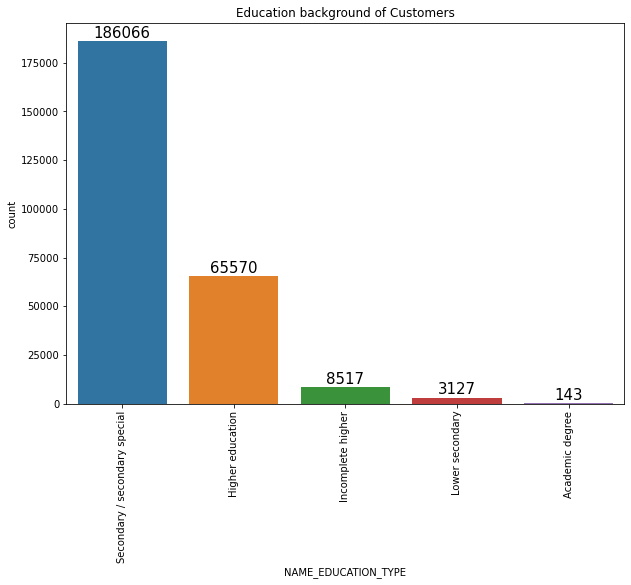

In [86]:
plt.figure(figsize=(10,7))
plt.title("Education background of Customers")
plots = sns.countplot(x = 'NAME_EDUCATION_TYPE', data=application_data )
plt.xticks(rotation = 90)
for bar in plots.patches:
  plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show();

As seen in the plot, 70 percent customers are secondary/ secondary special educated

**Customers Family Status**

In [87]:
application_data.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.647624
Single / not married    0.140990
Civil marriage          0.093864
Separated               0.065230
Widow                   0.052292
Name: NAME_FAMILY_STATUS, dtype: float64

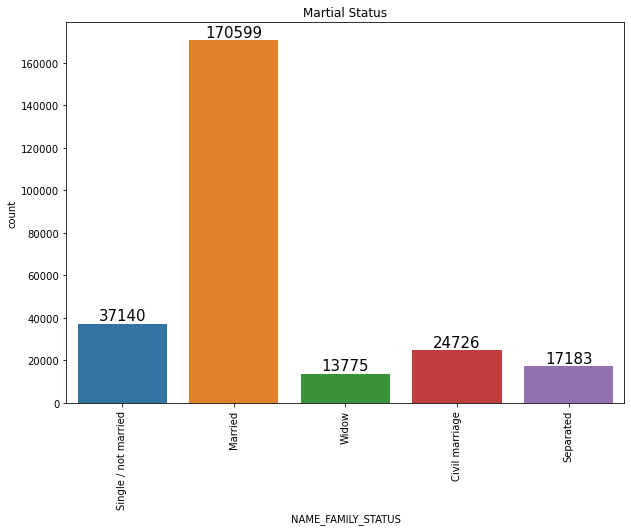

In [88]:
plt.figure(figsize=(10,7))
plt.title("Martial Status")
plots = sns.countplot(x = 'NAME_FAMILY_STATUS', data=application_data )
plt.xticks(rotation = 90)
for bar in plots.patches:
  plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show();

Nearly 64.7 percent of total customers who are applying for loan are married.

**Customers Occupation Info**

In [89]:
application_data.OCCUPATION_TYPE.value_counts(normalize=True)

UNKNOWN                  0.312592
Laborers                 0.178420
Sales staff              0.101164
Core staff               0.091575
Managers                 0.071994
Drivers                  0.060166
High skill tech staff    0.037666
Accountants              0.032909
Medicine staff           0.029007
Security staff           0.021490
Cooking staff            0.019197
Cleaning staff           0.014938
Private service staff    0.008378
Low-skill Laborers       0.006081
Secretaries              0.004297
Waiters/barmen staff     0.004164
Realty agents            0.002365
HR staff                 0.001890
IT staff                 0.001704
Name: OCCUPATION_TYPE, dtype: float64

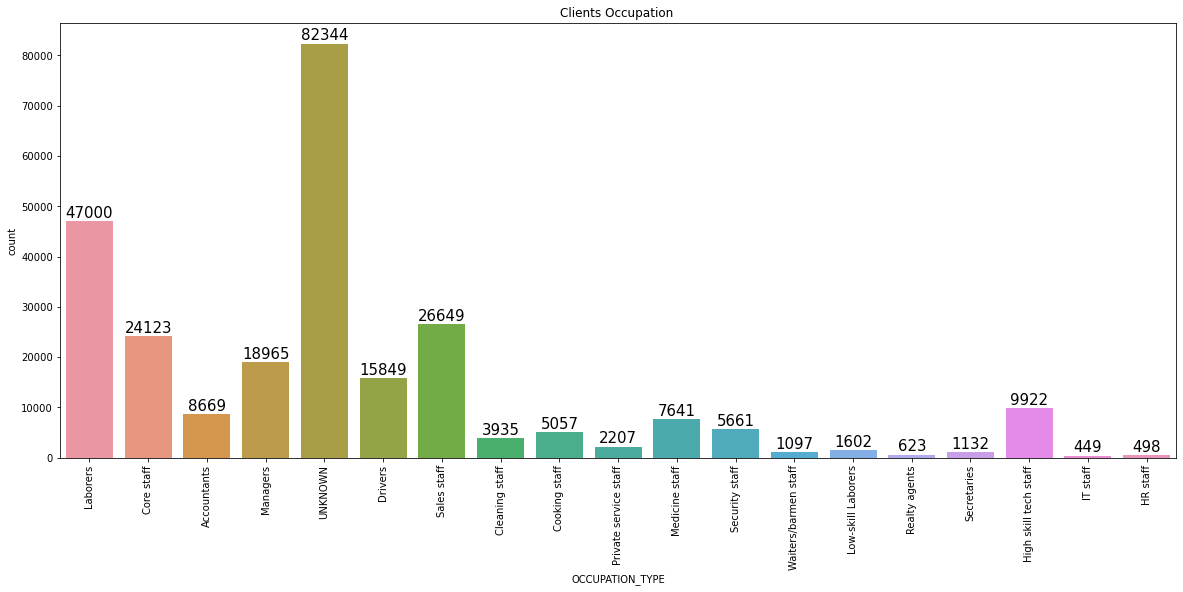

In [90]:
plt.figure(figsize=(20,8))
plt.title("Clients Occupation ")
plots = sns.countplot(x = 'OCCUPATION_TYPE', data=application_data )
plt.xticks(rotation = 90)
for bar in plots.patches:
  plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show();

In the given data, 17.8 percent customers are labourers which is highest.Around 31.2 percent customers occupation is Unknown.

**Customers Working Organization Info**

In [91]:
application_data.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.219309
XNA                       0.179434
Self-employed             0.120065
Other                     0.054479
Medicine                  0.037890
Business Entity Type 2    0.035593
Government                0.034841
School                    0.030085
Trade: type 7             0.024614
Kindergarten              0.023198
Construction              0.021460
Business Entity Type 1    0.019789
Transport: type 4         0.017664
Industry: type 9          0.011483
Trade: type 3             0.011176
Industry: type 3          0.010736
Security                  0.010572
Housing                   0.009771
Industry: type 11         0.008894
Military                  0.008883
Bank                      0.008428
Police                    0.008078
Transport: type 2         0.007710
Agriculture               0.007604
Postal                    0.006932
Security Ministries       0.006860
Trade: type 2             0.005804
Restaurant                0.005641
Services            

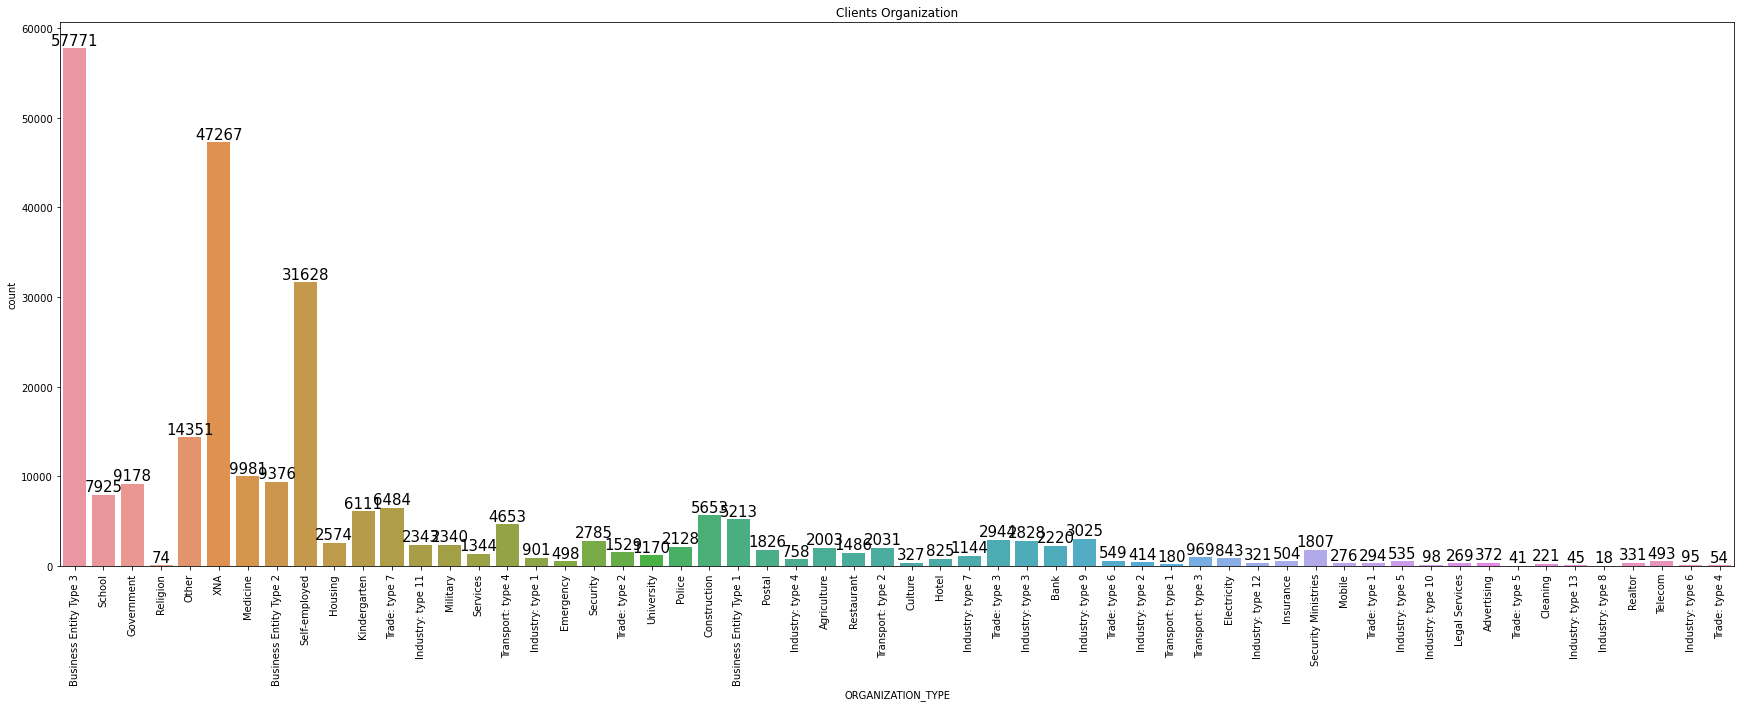

In [92]:
plt.figure(figsize=(30,10))
plt.title("Clients Organization")
plots = sns.countplot(x = 'ORGANIZATION_TYPE', data=application_data )
plt.xticks(rotation = 90)
for bar in plots.patches:
  plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show();

21.9 percent of total customers working in **Business Entity Type 3** Organizations. 

**Exploring for Documents Info**

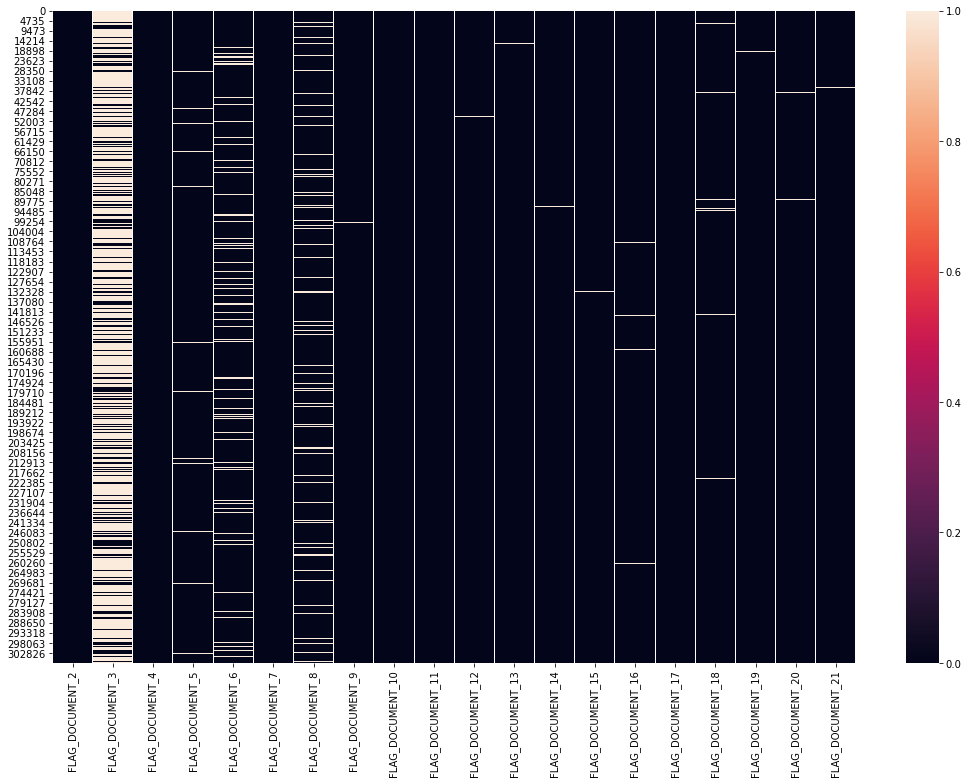

In [93]:
starting_id = application_data.columns.get_loc("FLAG_DOCUMENT_2")
ending_id = application_data.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(18,12))
sns.heatmap(application_data.iloc[:,starting_id:ending_id])
plt.show()

It is evident that for all the application Document 3 is considered as primary document. There are very few cases where other documents are submitted. For further analysis we can ignore the other document columns

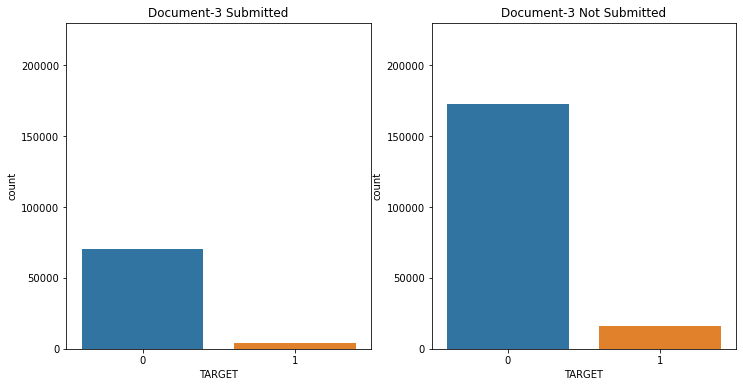

In [94]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,230000), title="Document-3 Submitted")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,230000), title="Document-3 Not Submitted")

sns.countplot(application_data[application_data["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=ax1)
sns.countplot(application_data[application_data["FLAG_DOCUMENT_3"] == 1]["TARGET"], ax=ax2)
plt.show()

In [95]:
start_id = application_data.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_id = application_data.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_data = application_data.iloc[:, start_id:end_id+1]

In [96]:
social_circle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263423 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  263423 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  263423 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  263423 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  263423 non-null  float64
dtypes: float64(4)
memory usage: 18.1 MB


<AxesSubplot:>

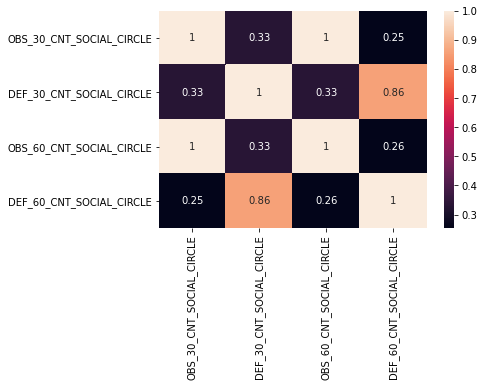

In [97]:
sns.heatmap(social_circle_data.corr(), annot=True)

* DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
* OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns

**Assets Info**

In [98]:

application_data[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263423 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   FLAG_OWN_CAR     263423 non-null  object
 1   FLAG_OWN_REALTY  263423 non-null  object
 2   TARGET           263423 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 16.1+ MB


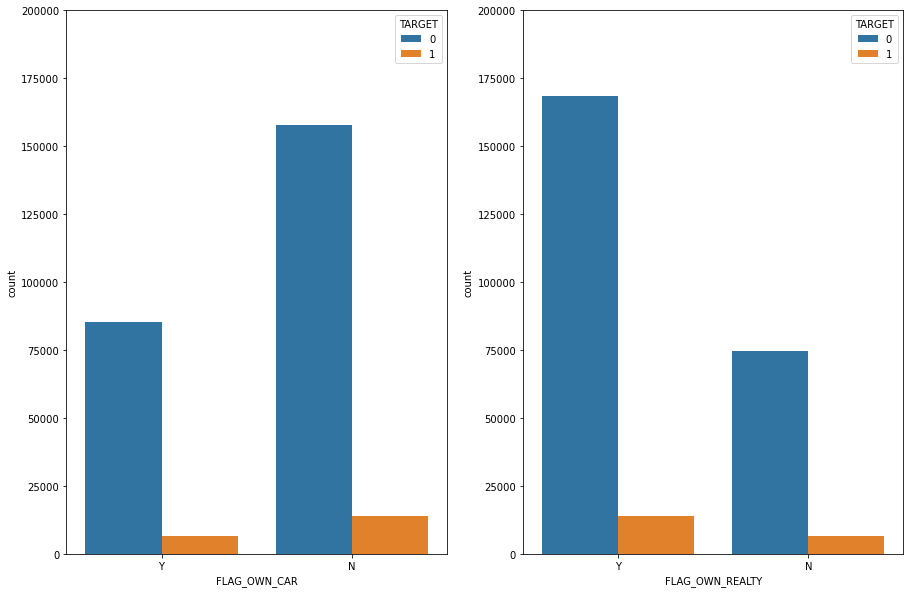

In [99]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(application_data['FLAG_OWN_CAR'], hue=application_data['TARGET'], order=['Y','N'], ax=ax1)
sns.countplot(application_data['FLAG_OWN_REALTY'], hue=application_data['TARGET'], order=['Y','N'], ax=ax2)

plt.show()

* Most of the applicants own realty
* Most of the applicants do not own cars
* People not owning reality and car and have a slightly higher default rate than the people who own reality and car

**Occupation and Education Info**

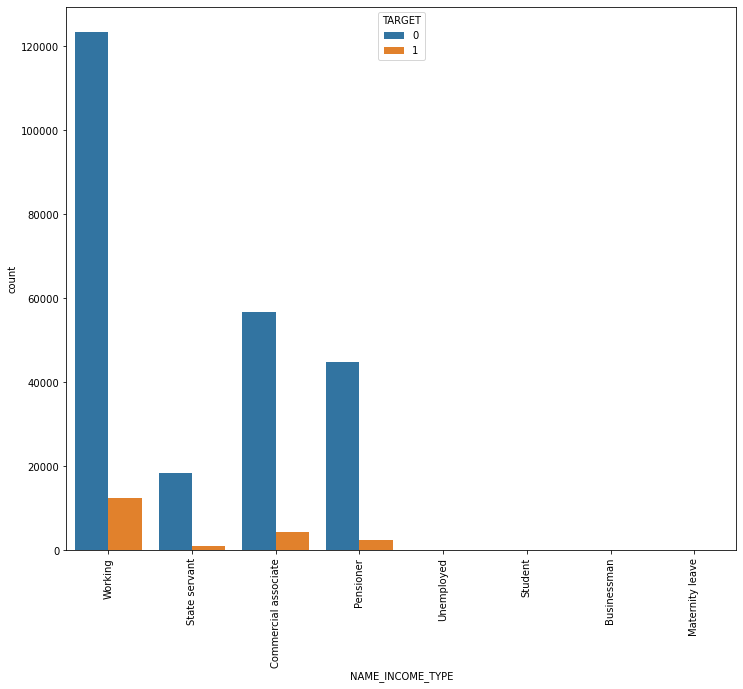

In [100]:
plt.figure(figsize=(12,10))
sns.countplot(application_data['NAME_INCOME_TYPE'], hue=application_data["TARGET"])
plt.xticks(rotation=90)
plt.show()

* Most of the applicants are working.
* 'Unemployed', 'Student', 'Businessman', 'Maternity leave' have very few in data in the dataset to contribute in the analysis.

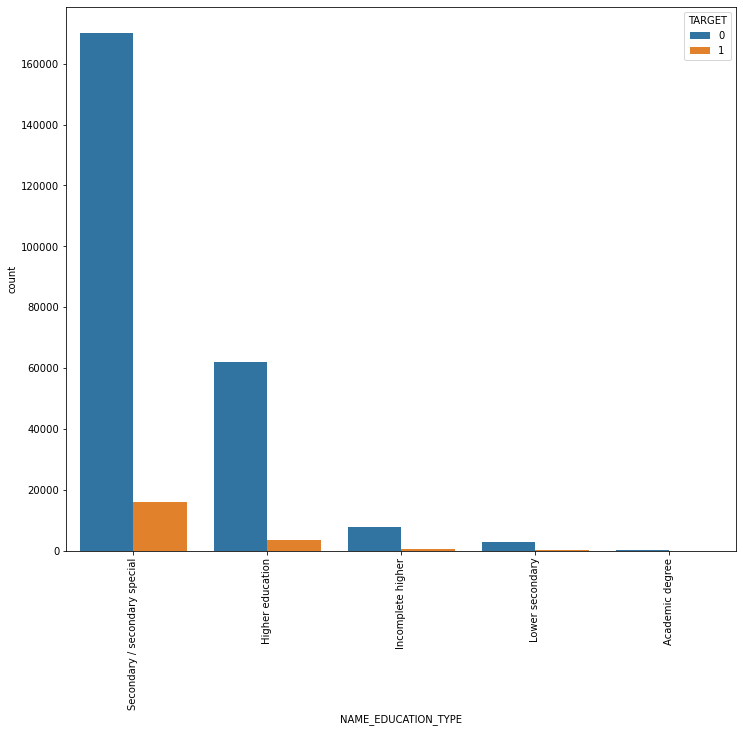

In [101]:
plt.figure(figsize=(12,10))
sns.countplot(application_data['NAME_EDUCATION_TYPE'], hue=application_data["TARGET"])
plt.xticks(rotation=90)
plt.show()

No of DEFAULTERS and NON DEFAULTERS are highest in Secondary/Secondary Special Category.

**Gender Based Inference**

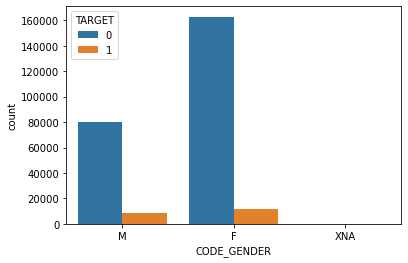

In [102]:
sns.countplot(application_data['CODE_GENDER'], hue=application_data["TARGET"])
plt.show()

* Female applicants are more than male applicants
* Defaulter percentage is higher for male applicants

**NAME_CONTRACT_TYPE vs TARGET**

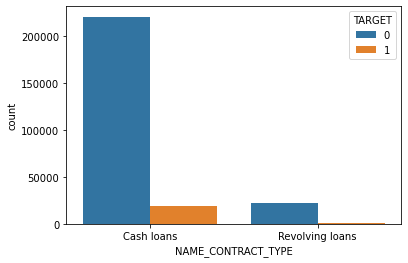

In [103]:
sns.countplot(application_data['NAME_CONTRACT_TYPE'], hue=application_data["TARGET"])
plt.show()

Application for Cash loan is marginally greater than for Revolving loans

**NAME_FAMILY_STATUS vs TARGET**

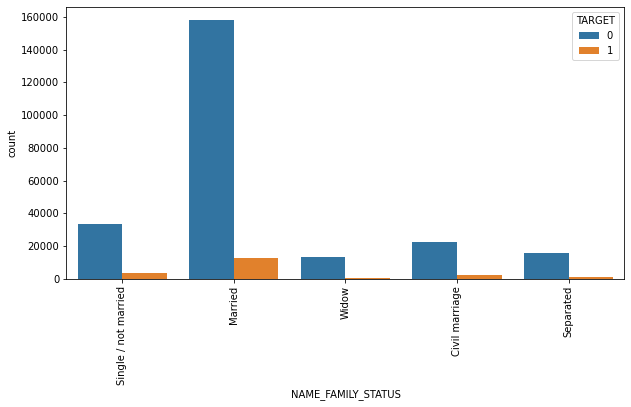

In [104]:
plt.figure(figsize=(10,5))
sns.countplot(application_data['NAME_FAMILY_STATUS'], hue=application_data["TARGET"])
plt.xticks(rotation = 90)
plt.show()

We can infer that married applicants are relatively safer to sanction loan as the ratio of defaulters to non defaulters is less.

Top 10 Correlations for Defaulters

In [105]:

non_default  = application_data[application_data["TARGET"] == 0]
default  = application_data[application_data["TARGET"] == 1]

In [106]:
defaulter_corr = default.corr()
round(defaulter_corr, 2)
def_corr_list = defaulter_corr.unstack()

In [107]:
def_corr_list.sort_values(ascending=False).drop_duplicates().head(15)

SK_ID_CURR                    SK_ID_CURR                      1.000000
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998319
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997207
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.995077
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989390
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986813
AMT_GOODS_PRICE               AMT_CREDIT                      0.982847
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.977995
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.974868
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.957080
CNT_FAM_MEMBERS               CNT_CHILDREN                    0.888229
DEF_30_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE        0.867263
REG_REGION_NOT_WORK_REGION    LIVE_REGION_NOT_WORK_REGION     0.852073
LIVE_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY          0.782768
AMT_AN

Top 10 Correlations for Non-Defaulters

In [108]:
nondefaulter_corr = non_default.corr()
round(nondefaulter_corr, 2)
nondef_corr_list = nondefaulter_corr.unstack()

In [109]:
nondef_corr_list.sort_values(ascending=False).drop_duplicates().head(15)

SK_ID_CURR                    SK_ID_CURR                      1.000000
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998529
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997261
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993341
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989083
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987152
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986633
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.970441
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.960780
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.949882
CNT_CHILDREN                  CNT_FAM_MEMBERS                 0.880298
LIVE_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION      0.865952
DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE        0.858554
LIVE_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY          0.835232
AMT_GO

**EDUCATION VS NAME_FAMILY_STATUS VS TARGET**





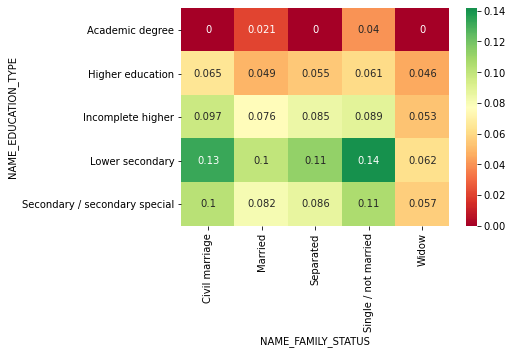

In [110]:
res = pd.pivot_table(data = application_data,index = 'NAME_EDUCATION_TYPE',columns = 'NAME_FAMILY_STATUS',values = 'TARGET')
sns.heatmap(res,annot = True,cmap = 'RdYlGn',center = application_data.TARGET.mean())
plt.show()

We can infer that The defaulters are hign in following cases:
* Lower Secondary education and civil marriage
* Lower Secondary education and Separated
* Lower Secondary education and Single/Not Married
* Secondary/Secondary special education and Civil marriage
* Secondary/Secondary special education and Single/Not Married

**EDUCATION VS NAME_INCOME_TYPE VS TARGET**

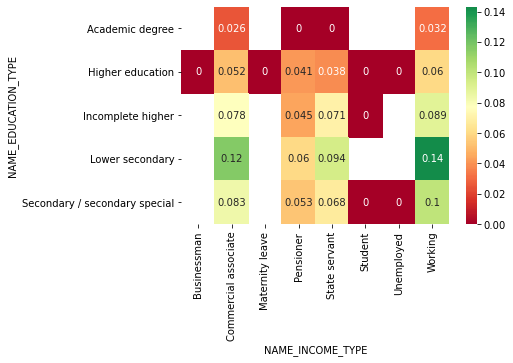

In [111]:
res = pd.pivot_table(data = application_data,index = 'NAME_EDUCATION_TYPE',columns = 'NAME_INCOME_TYPE',values = 'TARGET')
sns.heatmap(res,annot = True,cmap = 'RdYlGn',center = application_data.TARGET.mean())
plt.show()

From the data available to use we can say that number of defaulters are higher in case of Seconday/Secondary special education and Maternity Leave

**NAME_INCOME_TYPE VS NAME_FAMILY_STATUS VS TARGET**

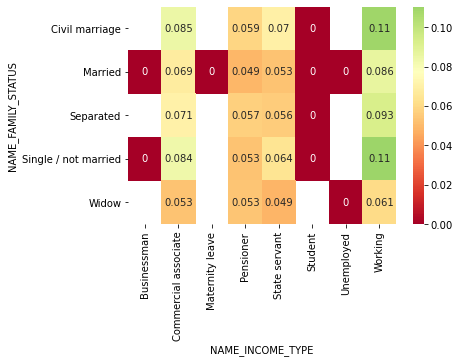

In [112]:
res = pd.pivot_table(data = application_data,index = 'NAME_FAMILY_STATUS',columns = 'NAME_INCOME_TYPE',values = 'TARGET')
sns.heatmap(res,annot = True,cmap = 'RdYlGn',center = application_data.TARGET.mean())
plt.show()

* We can strongly infer that Unemployed Widows, Single/not married, Married have higher chances of being defaulters

**CODE_GENDER VS NAME_FAMILY_STATUS VS TARGET**

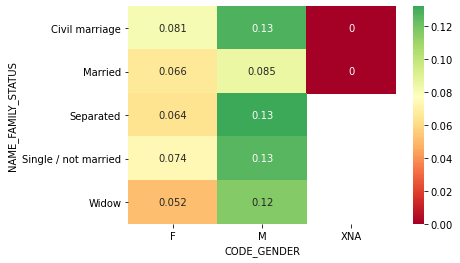

In [113]:
res = pd.pivot_table(data = application_data,index = 'NAME_FAMILY_STATUS',columns = 'CODE_GENDER',values = 'TARGET')
sns.heatmap(res,annot = True,cmap = 'RdYlGn',center = application_data.TARGET.mean())
plt.show()

Even though the number of Female applicants are greater than number of male applicants as infered previously, the number of defaults are larger in Male except for Married.

**CODE_GENDER VS NAME_INCOME_TYPE VS TARGET**

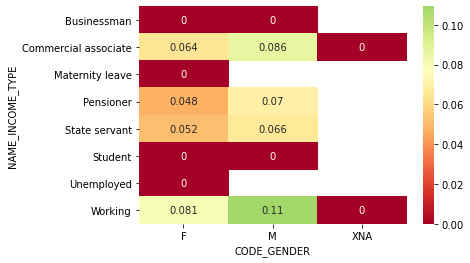

In [114]:
res = pd.pivot_table(data = application_data,index = 'NAME_INCOME_TYPE',columns = 'CODE_GENDER',values = 'TARGET')
sns.heatmap(res,annot = True,cmap = 'RdYlGn',center = application_data.TARGET.mean())
plt.show()

**Top 10 Correlations for Defaulters**
* OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE        0.998270
* FLOORSMAX_AVG and FLOORSMAX_MEDI                  0.997295
* YEARS_BEGINEXPLUATATION_MEDI and YEARS_BEGINEXPLUATATION_AVG     0.996139
* FLOORSMAX_MEDI and FLOORSMAX_MODE                  0.989472
* FLOORSMAX_AVG and FLOORSMAX_MODE                  0.986935
* AMT_GOODS_PRICE and AMT_CREDIT                      0.982783
* YEARS_BEGINEXPLUATATION_MODE and YEARS_BEGINEXPLUATATION_AVG     0.980546
* YEARS_BEGINEXPLUATATION_MEDI and YEARS_BEGINEXPLUATATION_MODE    0.978163
* REGION_RATING_CLIENT and  REGION_RATING_CLIENT_W_CITY     0.956637
* CNT_CHILDREN and CNT_FAM_MEMBERS                 0.885484

**Top 10 Correlations for NonDefaulters**
* OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE        0.998510
* FLOORSMAX_AVG and FLOORSMAX_MEDI                  0.997253
* YEARS_BEGINEXPLUATATION_MEDI and YEARS_BEGINEXPLUATATION_AVG     0.993594
* FLOORSMAX_MODE and FLOORSMAX_MEDI                  0.988955
* AMT_CREDIT and AMT_GOODS_PRICE                 0.987022
* FLOORSMAX_AVG and FLOORSMAX_MODE                  0.986569
* YEARS_BEGINEXPLUATATION_AVG and YEARS_BEGINEXPLUATATION_MODE    0.971086
* YEARS_BEGINEXPLUATATION_MEDI and YEARS_BEGINEXPLUATATION_MODE    0.962133
* REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT            0.950149
* CNT_FAM_MEMBERS and CNT_CHILDREN                    0.878571

**Summary :**
* This data is highly imbalanced as number of defaulter is very less in total population.

* Documents : Most of the applicants did not submit any documents apart from DOCUMENT_3.

* Housing: 
    * Most of the applicants live in House/Apartment.
    * Applicants living with their parents or in rented apartment have higher rate of default.

* Social Circle Info: The features show similar trend for defaulters and nondefalters, can be dropped.

* Asset Info : 
    * Most of the applicants own realty.
    * Most of the applicants do not own cars.
    * People not owning reality and car and have a slightly higher default rate than the people who own reality and car
  
* Gender Info :
    * Female applicants are more than male applicants
    * Defauter percentage is higher for male applicants
    * XNA values can be replaced with "Unknown"

**AMT_INCOME_TOTAL vs	AMT_CREDIT vs	AMT_ANNUITY vs	AMT_GOODS_PRICE**

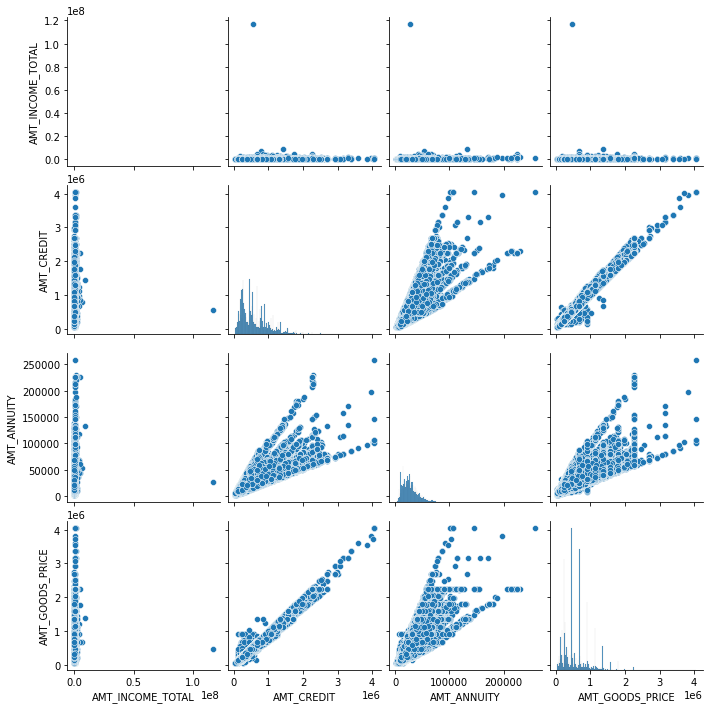

In [116]:
start_id = application_data.columns.get_loc('AMT_INCOME_TOTAL')
end_id = application_data.columns.get_loc('AMT_GOODS_PRICE')

sns.pairplot(application_data.iloc[:, start_id:end_id+1])
plt.show()

1)The AMT_GOODS_PRICE and AMT_GOODS_PRICE has strong linear correlation.

2)There is no linear correlation between AMT_INCOME_TOTAL with other columns

3)AMT_CREDIT and AMT_ANNUITY has weak linear correlation.

4)AMT_GOODS_PRICE and AMT_ANNUITY has weak linear correlation

